In [1]:
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('HAM10000_metadata.csv')
print (len(data))
data.head()

10015


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
image_dict={os.path.splitext(os.path.basename(x))[0]:x for x in glob(os.path.join('images','*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [4]:
print (len(image_dict))

10015


In [5]:
data['path'] = data['image_id'].map(image_dict.get)
data['cell_type'] = data['dx'].map(lesion_type_dict.get)
data['label'] = pd.Categorical(data['cell_type']).codes
data.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,label
7698,HAM_0003254,ISIC_0032765,nv,histo,40.0,female,back,images\ISIC_0032765.jpg,Melanocytic nevi,4
5907,HAM_0003232,ISIC_0032448,nv,follow_up,25.0,female,upper extremity,images\ISIC_0032448.jpg,Melanocytic nevi,4
5308,HAM_0003795,ISIC_0028811,nv,follow_up,40.0,female,abdomen,images\ISIC_0028811.jpg,Melanocytic nevi,4
4930,HAM_0006051,ISIC_0030475,nv,follow_up,45.0,male,lower extremity,images\ISIC_0030475.jpg,Melanocytic nevi,4
1603,HAM_0000388,ISIC_0032844,mel,histo,60.0,male,back,images\ISIC_0032844.jpg,dermatofibroma,6


In [6]:
import numpy as np
data.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type
count,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15,10015,7
top,HAM_0001863,ISIC_0031842,nv,histo,male,back,images\ISIC_0027730.jpg,Melanocytic nevi
freq,6,1,6705,5340,5406,2192,1,6705


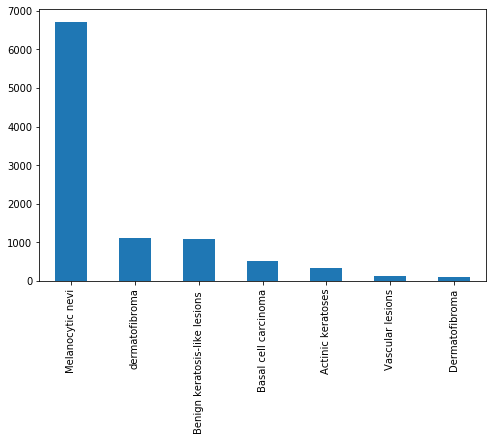

In [7]:
fig, ax1 = plt.subplots(1,1,figsize=(8,5))
data['cell_type'].value_counts().plot('bar',ax=ax1)